#Diabetes

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
diabetes = load_diabetes()

In [2]:
df_X = diabetes.data
df_y = diabetes.target

In [3]:
print(type(df_X))
print(type(df_y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [4]:
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.3, random_state=42)

In [5]:
W = np.random.rand(10)
b = np.random.rand()

In [6]:
def model(X, W, b):
    predictions = 0
    for i in range(10):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

In [7]:
def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse

In [8]:
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

In [9]:
def gradient(X, W, b, y):
    # N은 데이터 포인트의 개수
    N = len(y)
    
    # y_pred 준비
    y_pred = model(X, W, b)
    
    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)
        
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db

In [10]:
dW, db = gradient(X_train, W, b, y_train)
print("dW:", dW)
print("db:", db)

dW: [-1.72268441 -0.14221246 -5.43530447 -3.73817675 -1.87629925 -1.51087531
  3.1561455  -3.72931565 -4.51059435 -3.81900465]
db: -307.76174652591214


In [11]:
LEARNING_RATE = 0.1

In [12]:
losses = []

for i in range(1, 1001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 10 : Loss 6327.3197
Iteration 20 : Loss 5981.0522
Iteration 30 : Loss 5903.9505
Iteration 40 : Loss 5832.2245
Iteration 50 : Loss 5762.7556
Iteration 60 : Loss 5695.4332
Iteration 70 : Loss 5630.1837
Iteration 80 : Loss 5566.9366
Iteration 90 : Loss 5505.6237
Iteration 100 : Loss 5446.1795
Iteration 110 : Loss 5388.5406
Iteration 120 : Loss 5332.6458
Iteration 130 : Loss 5278.4362
Iteration 140 : Loss 5225.8549
Iteration 150 : Loss 5174.8470
Iteration 160 : Loss 5125.3594
Iteration 170 : Loss 5077.3410
Iteration 180 : Loss 5030.7426
Iteration 190 : Loss 4985.5164
Iteration 200 : Loss 4941.6165
Iteration 210 : Loss 4898.9987
Iteration 220 : Loss 4857.6200
Iteration 230 : Loss 4817.4393
Iteration 240 : Loss 4778.4167
Iteration 250 : Loss 4740.5136
Iteration 260 : Loss 4703.6931
Iteration 270 : Loss 4667.9192
Iteration 280 : Loss 4633.1575
Iteration 290 : Loss 4599.3744
Iteration 300 : Loss 4566.5379
Iteration 310 : Loss 4534.6168
Iteration 320 : Loss 4503.5811
Iteration 330 : L

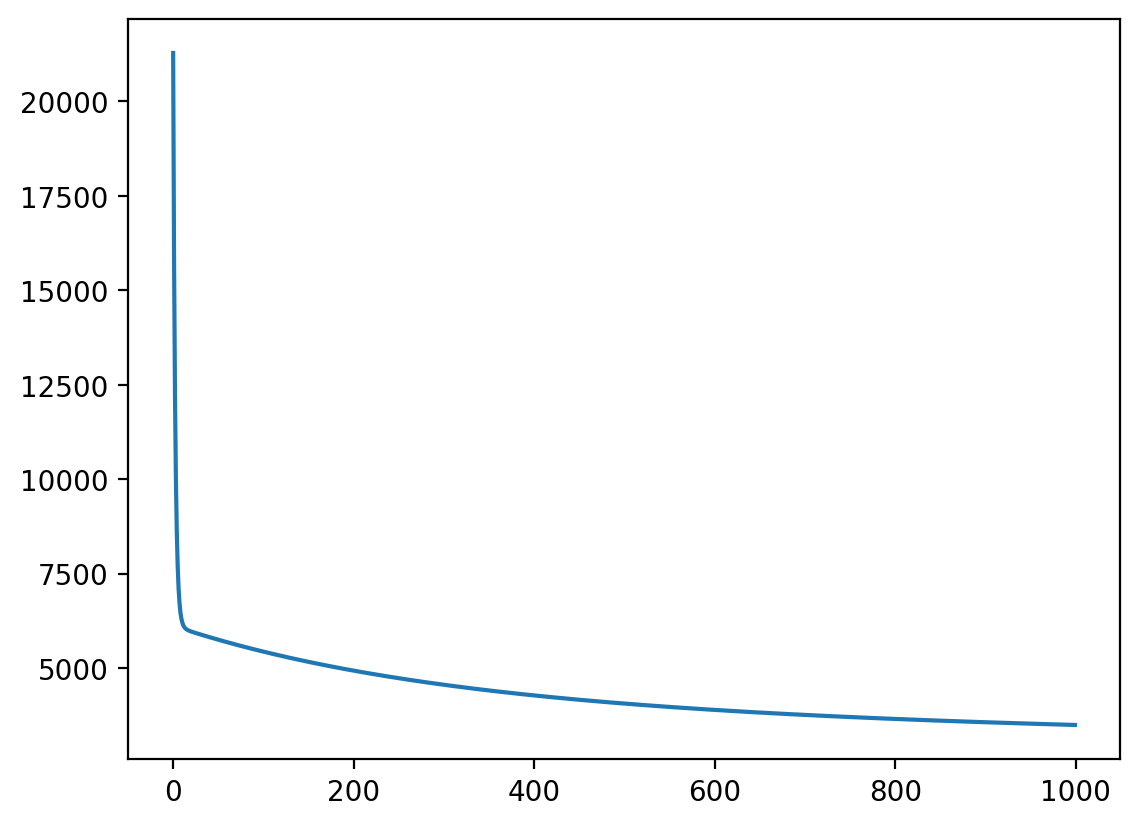

In [13]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

In [14]:
W, b

(array([  57.45593617,  -46.2977374 ,  276.49111036,  196.13956109,
          21.95608265,    5.66846406, -157.72324151,  140.94895871,
         207.77348793,  131.52535451]),
 151.66722247831453)

In [15]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

3075.539348267721

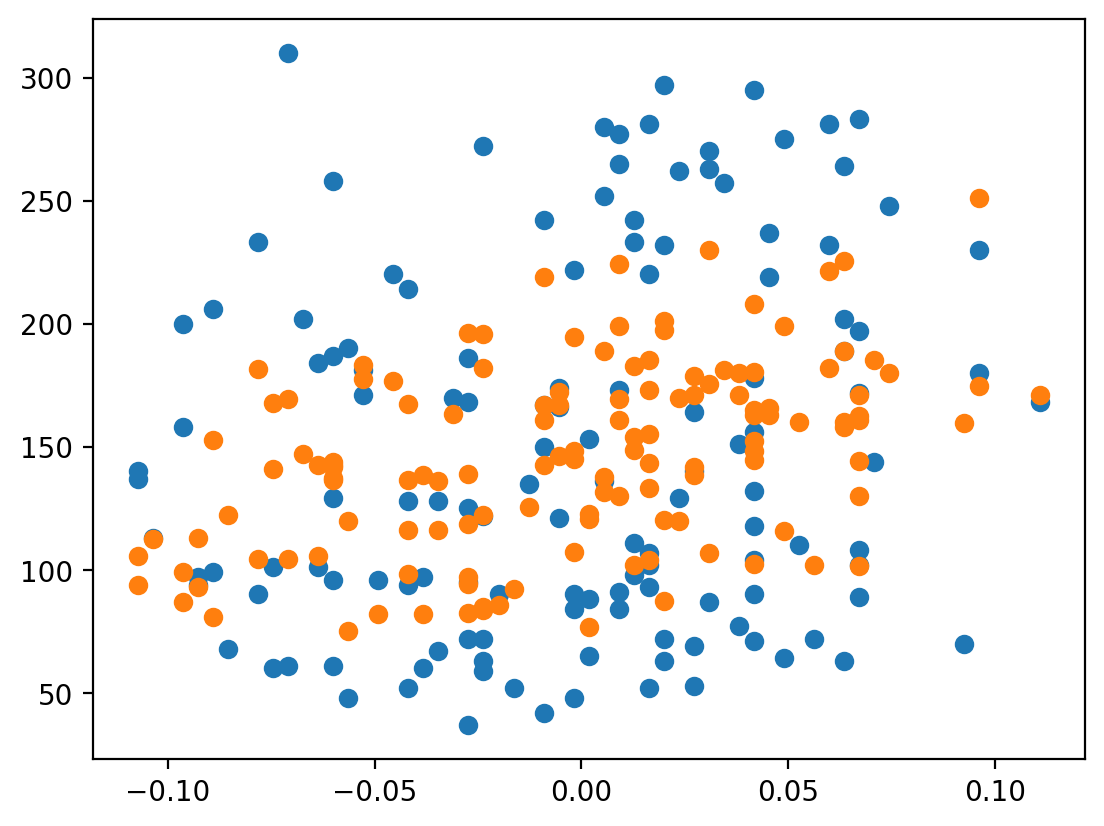

In [16]:
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()

#Bike-Sharing

In [17]:
#import
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'


In [18]:
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/aiffel/data/BikeSharing/train (1).csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/aiffel/data/BikeSharing/test (1).csv')

In [19]:
train['datetime']=pd.to_datetime(train['datetime'])

In [20]:
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second

In [21]:
cols = ['year','month','day','hour','minute','second']

In [22]:
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
year          0
month         0
day           0
hour          0
minute        0
second        0
dtype: int64

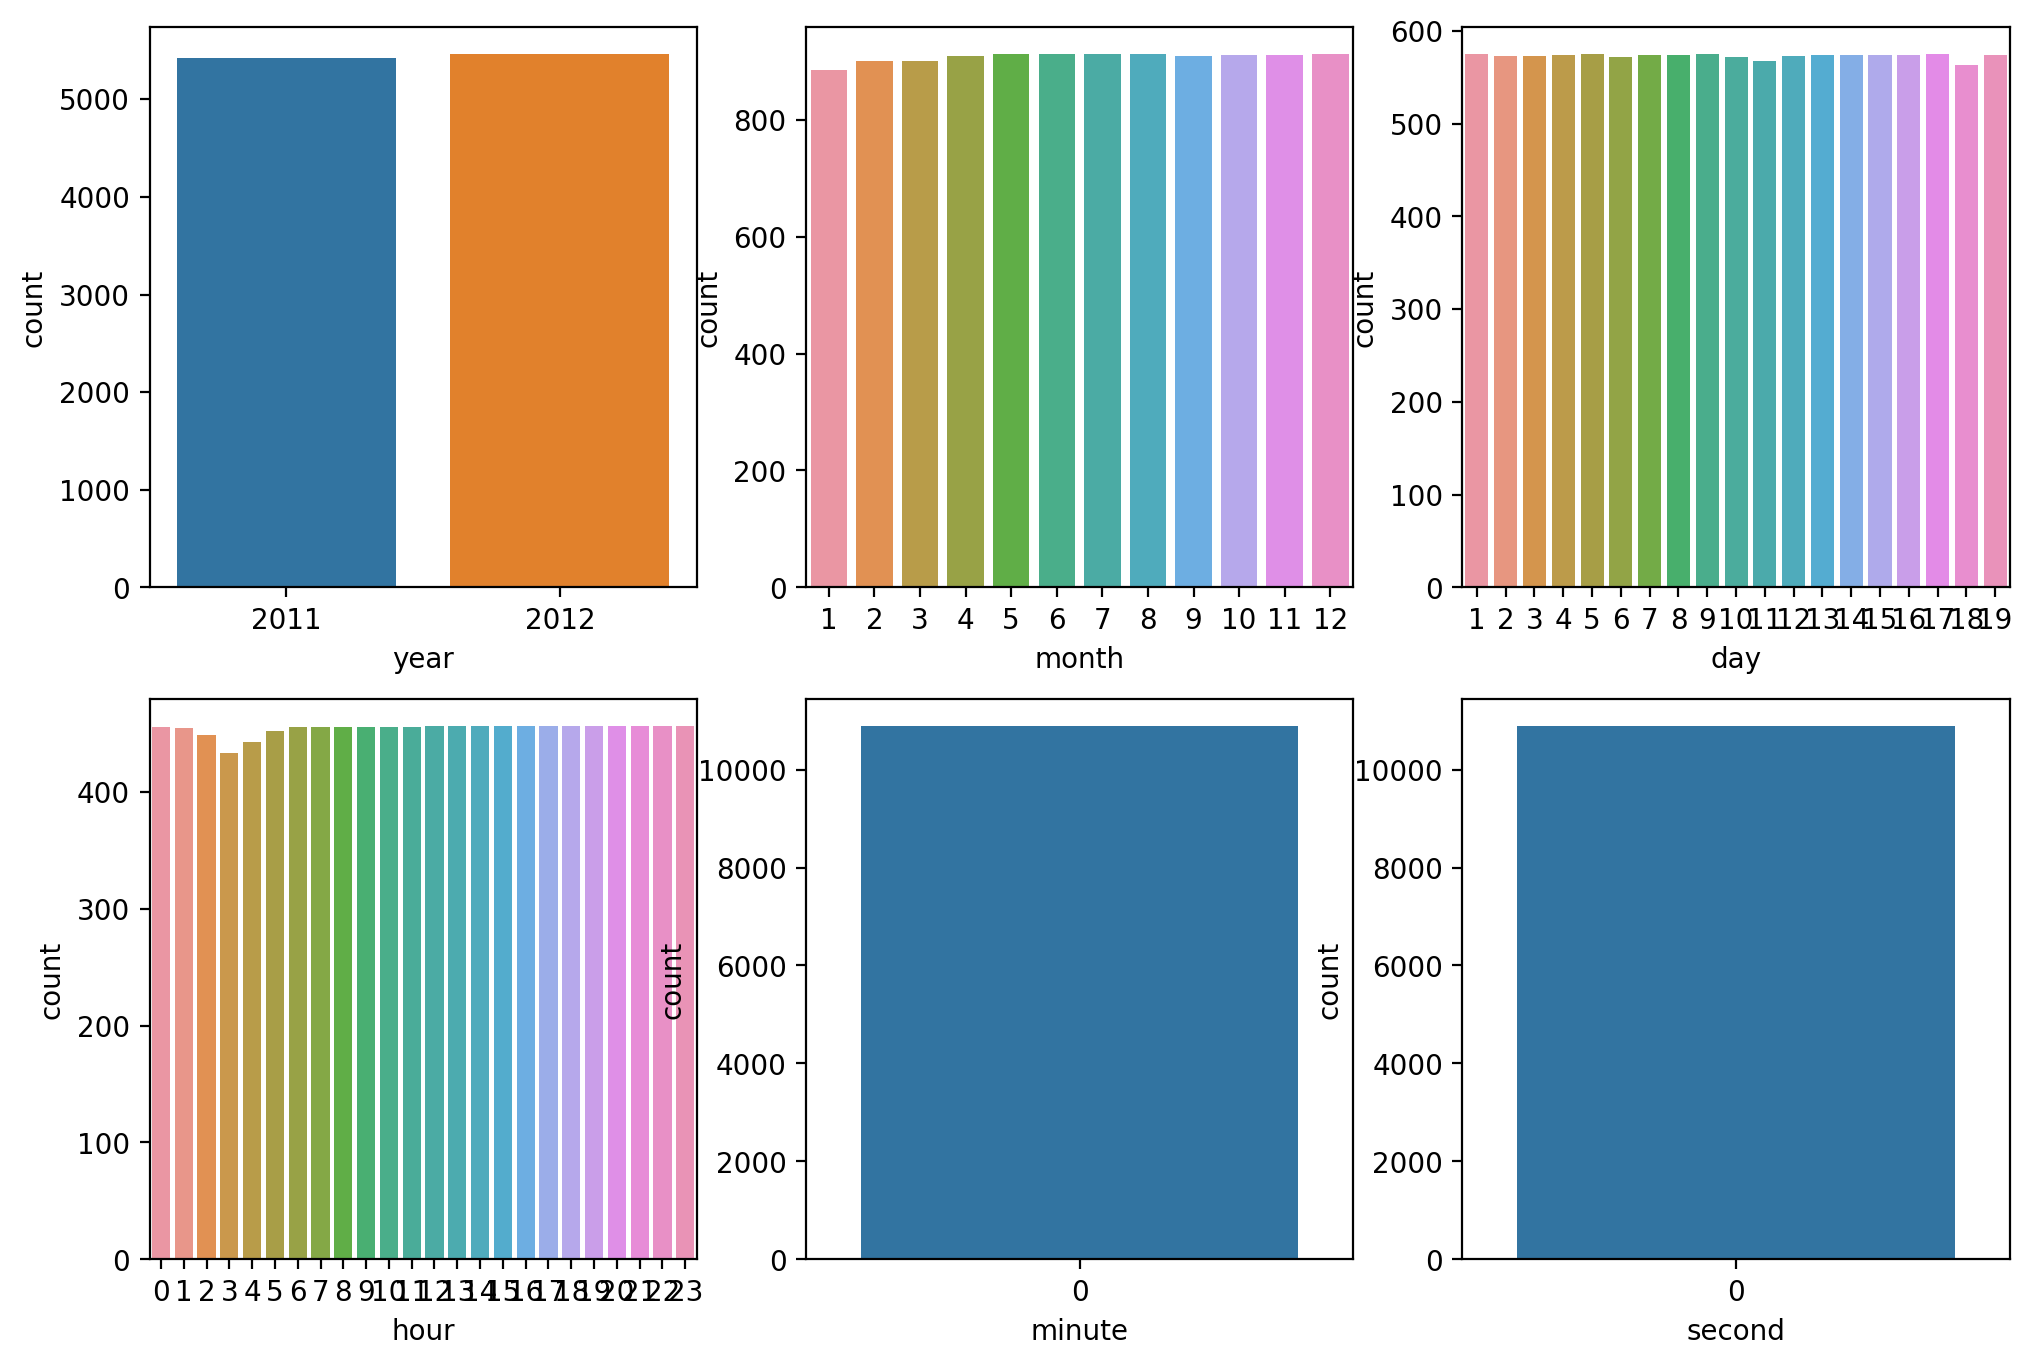

In [23]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))
for ax, col in zip(axes.flatten(), cols):
    sns.countplot(x=col, data=train, ax=ax)

In [24]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


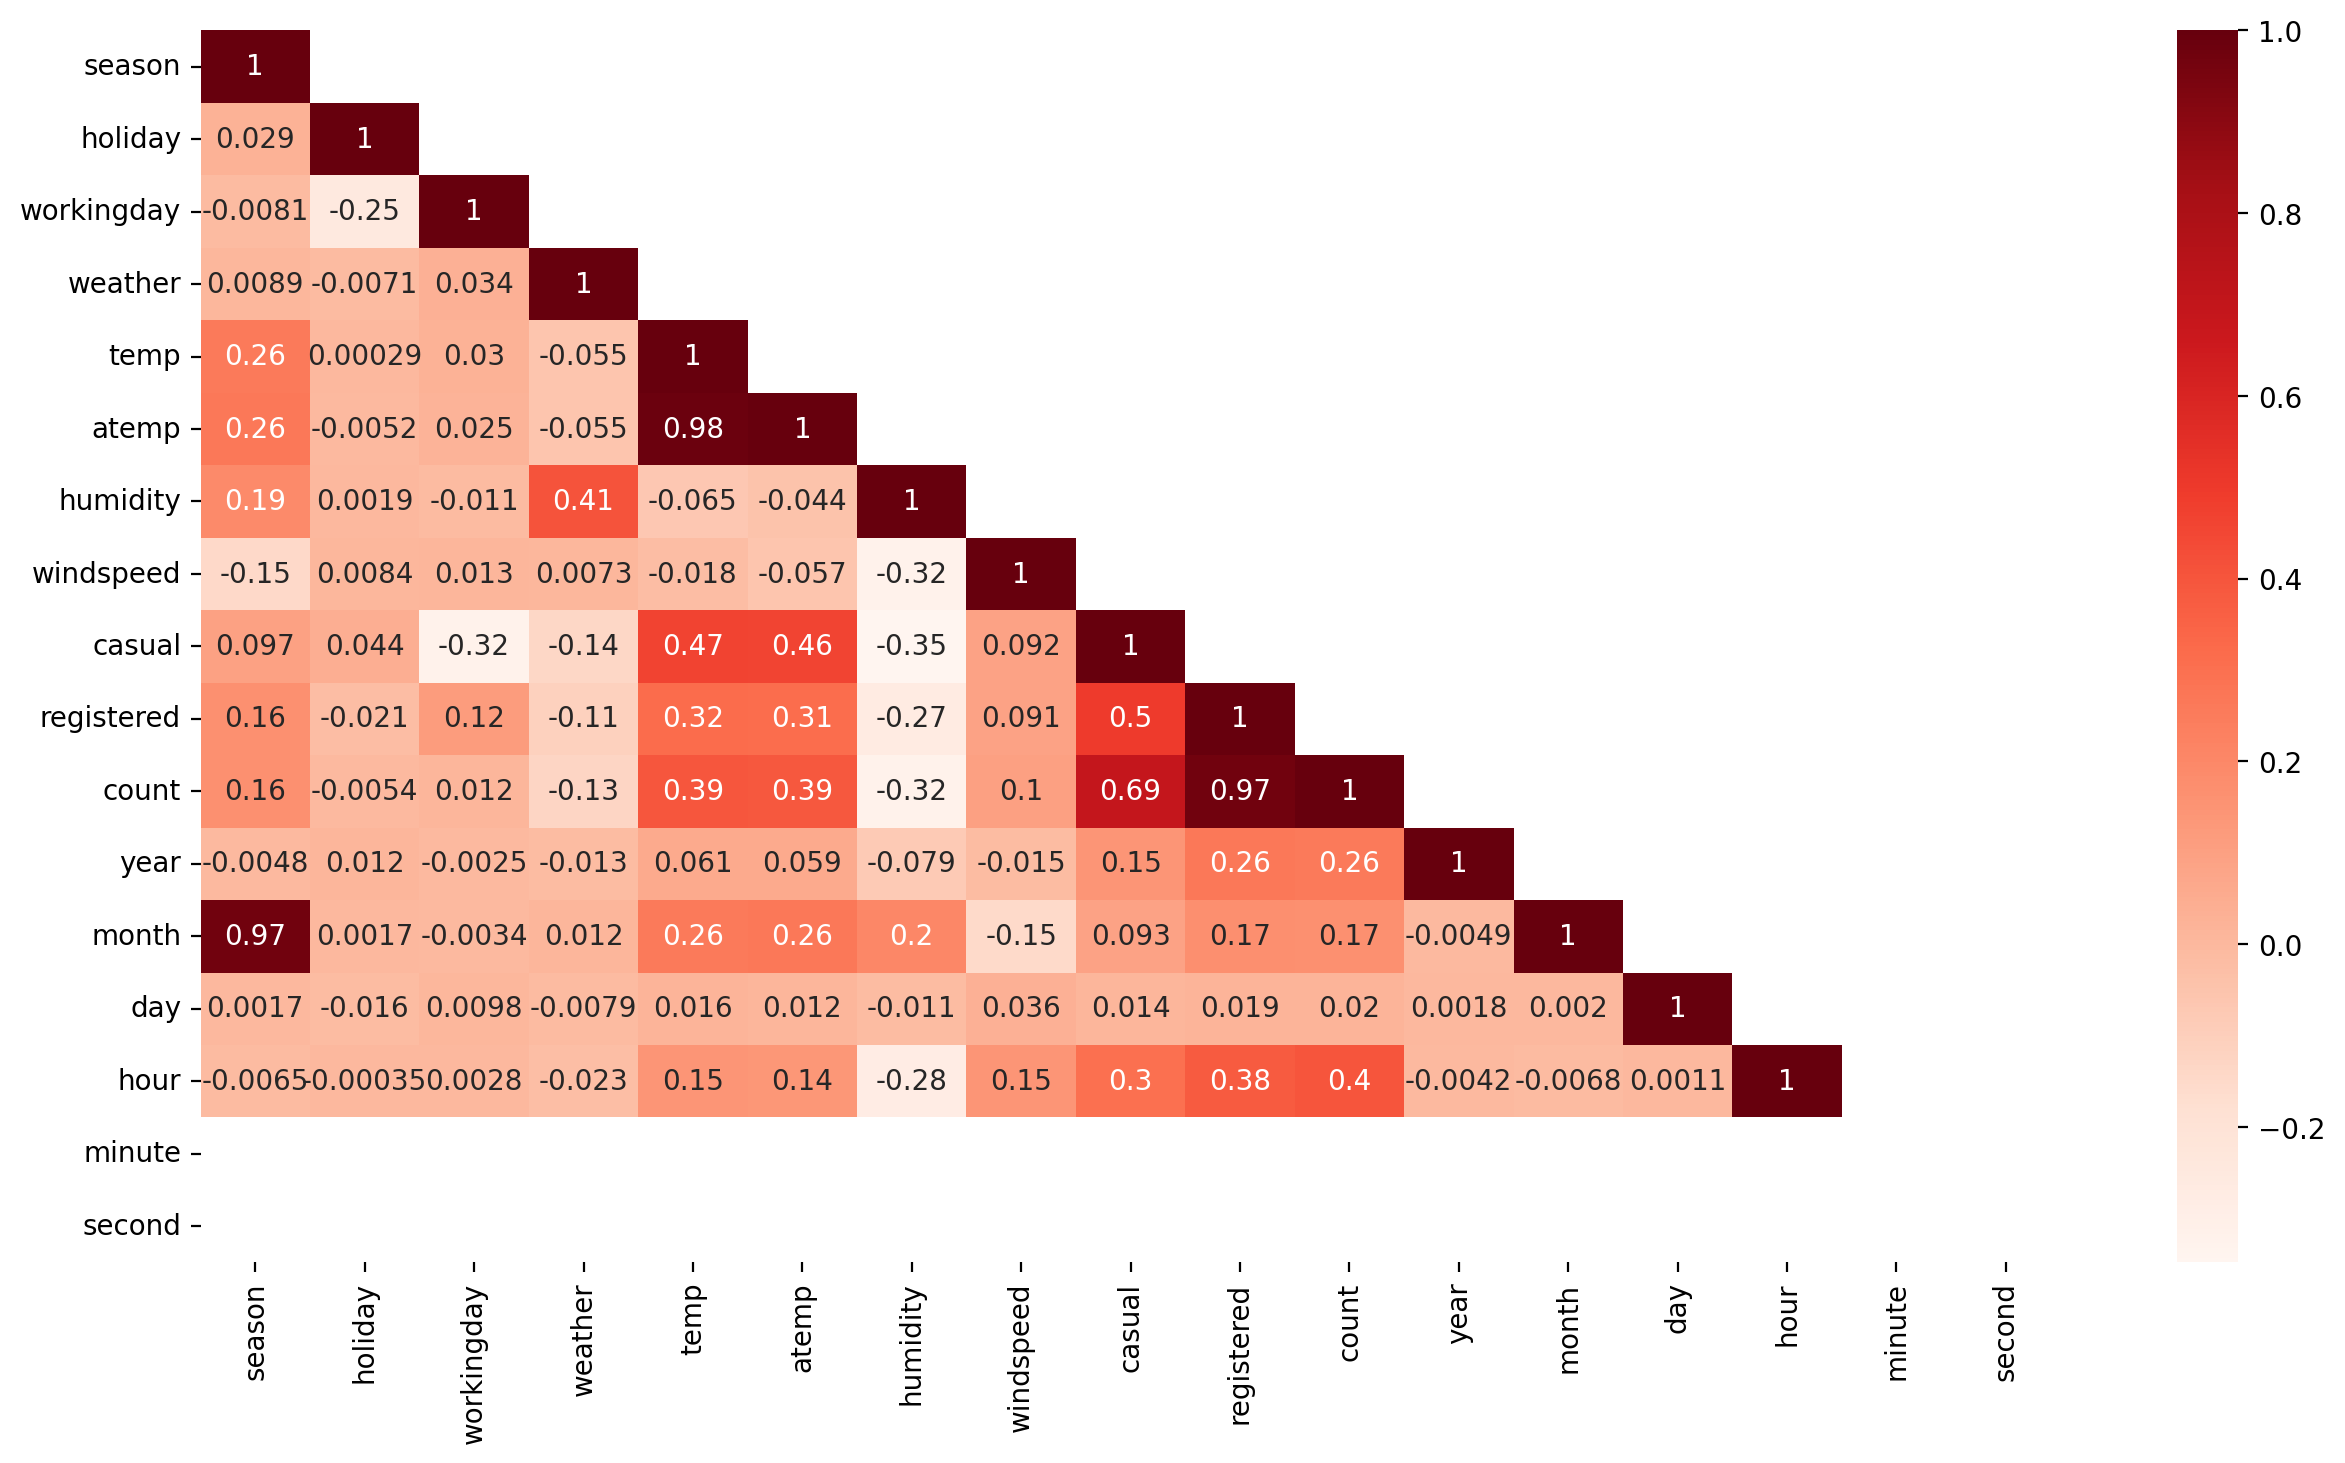

In [25]:
corr_matrix = train.corr()
mask = np.array(corr_matrix)
mask[np.tril_indices_from(mask)] = False
plt.figure(figsize=(15, 8))
sns.heatmap(corr_matrix, mask = mask, annot=True, cmap='Reds')
plt.show()

In [26]:
train.drop(['casual', 'registered'], axis=1, inplace=True)

In [27]:
train.drop('datetime', axis=1, inplace=True)

In [28]:
X=train[['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'year', 'month', 'day', 'hour', 'minute', 'second']]

In [29]:
y = train.pop('count')

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [32]:
predictions = lr.predict(X_test)
predictions

array([248.10627003,  48.79765547, 200.90676727, ..., 309.7528022 ,
        38.17030198, 243.62697388])

In [33]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions)

rmse = mean_squared_error(y_test, predictions, squared=False)
print(mse)
print(rmse)

19945.37005375408
141.22807813517142


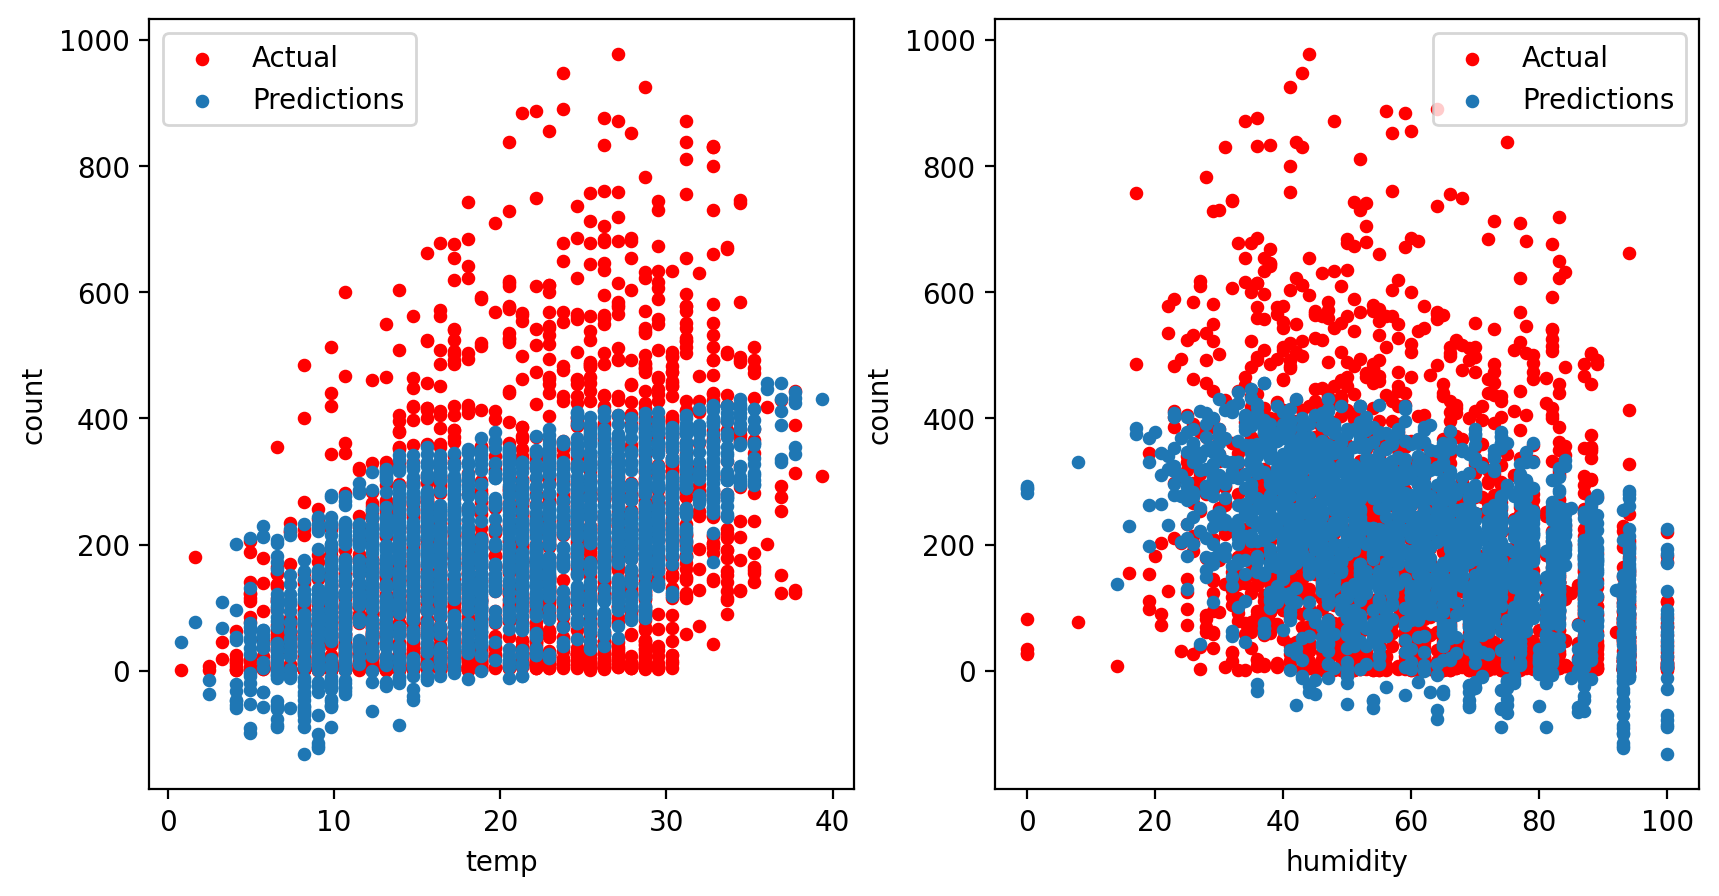

In [34]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.scatter(X_test['temp'], y_test, color='red', label='Actual', s=15)
ax1.scatter(X_test['temp'], predictions, label='Predictions', s=15)
ax1.set_xlabel('temp')
ax1.set_ylabel('count')
ax1.legend()

ax2.scatter(X_test['humidity'], y_test, color='red', label='Actual', s=15)
ax2.scatter(X_test['humidity'], predictions, label='Predictions', s=15)
ax2.set_xlabel('humidity')
ax2.set_ylabel('count')
ax2.legend()

plt.show()